# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

`imports`, you've seen this before!

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [2]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)


In [4]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [5]:
filepath = "ski_resort_stats.xlsx"

ski_df = pd.read_excel(filepath, skiprows=1)
print("done")


done


In [6]:
ski_df.head()


,resort_name,state,summit,base,vertical,lifts,runs,acres,green_percent,green_acres,blue_percent,blue_acres,black_percent,black_acres,lat,lon
0,"49(degrees) North, WA",Washington,5774.0,3923.0,1851.0,6.0,68.0,2325,0.30,697.50,0.40,930.00,0.30,697.5,49.00,-115.84
1,"Afton Alps, MN",Minnesota,700.0,350.0,350.0,21.0,48.0,300,0.20,60.00,0.60,180.00,0.20,60.0,44.85,-92.79
2,"Alpine Meadows, CA",California,8673.0,6385.0,2288.0,13.0,100.0,2400,0.25,600.00,0.40,960.00,0.35,840.0,39.17,-120.22
3,"Alpine Mountain, PA",Pennsylvania,1150.0,600.0,500.0,3.0,21.0,120,0.17,20.40,0.55,66.00,0.28,33.6,40.08,-76.90
4,"Alpine Valley, MI",Michigan,1210.0,910.0,300.0,14.0,25.0,118,0.39,46.02,0.26,30.68,0.35,41.3,44.96,-84.87


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.

In [7]:
ski_df.sample(5)


,resort_name,state,summit,base,vertical,lifts,runs,acres,green_percent,green_acres,blue_percent,blue_acres,black_percent,black_acres,lat,lon
97,"Dartmouth Skiway, NH",New Hampshire,1943.0,975.0,968.0,4.0,31.0,107,0.24,25.68,0.50,53.50,0.26,27.82,43.20,-71.56
172,"Maverick Mountain, MT",Montana,8820.0,6800.0,2020.0,2.0,24.0,210,0.20,42.00,0.35,73.50,0.45,94.50,45.45,-113.16
342,"White Pass, WA",Washington,6550.0,4500.0,2050.0,8.0,47.0,1402,0.15,210.30,0.65,911.30,0.20,280.40,46.64,-121.39
116,"Gladstone, MI",Michigan,NaN,NaN,130.0,5.0,6.0,30,0.60,18.00,0.40,12.00,NaN,0.00,45.86,-87.02
48,"Boston Mills/Brandywine, OH",Ohio,660.0,420.0,264.0,16.0,17.0,88,0.27,23.76,0.27,23.76,0.46,40.48,40.07,-82.95


We can also get the list of columns out of the data frame

In [8]:
ski_df.columns

Index(['resort_name', 'state', 'summit', 'base', 'vertical', 'lifts', 'runs',
       'acres', 'green_percent', 'green_acres', 'blue_percent', 'blue_acres',
       'black_percent', 'black_acres', 'lat', 'lon'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the `iloc` property. That means the _interger location_, so the zeroeth row would be `df.iloc[0]`. 

This gives us the row as a _Series_.

↓

In [9]:
row_one = ski_df.iloc[1]
row_one


resort_name      Afton Alps, MN
state                 Minnesota
summit                    700.0
base                      350.0
vertical                  350.0
lifts                      21.0
runs                       48.0
acres                       300
green_percent               0.2
green_acres                60.0
blue_percent                0.6
blue_acres                180.0
black_percent               0.2
black_acres                60.0
lat                       44.85
lon                      -92.79
Name: 1, dtype: object

Series objects are _very_ similar to dictionaries. They have more properties though.

In [11]:
row_one["resort_name"]

'Afton Alps, MN'

You can access them like a dictionary ☝ or you can access them like a property 👇. 

I like the `my_series.key_name` best, but it won't work if there are spaces in your column title. That can happen if you are getting the data from somewhere else (i.e. you didn't make it).

In [12]:
row_one.resort_name

'Afton Alps, MN'

Doing the same thing on a dataframe gives us the whole column

In [13]:
ski_df.summit

0      5774.0
1       700.0
2      8673.0
3      1150.0
4      1210.0
        ...  
359    6400.0
360    4700.0
361     850.0
362    1400.0
363     315.0
Name: summit, Length: 364, dtype: float64

what ski resort should i ski at in america?

Summit VS base 

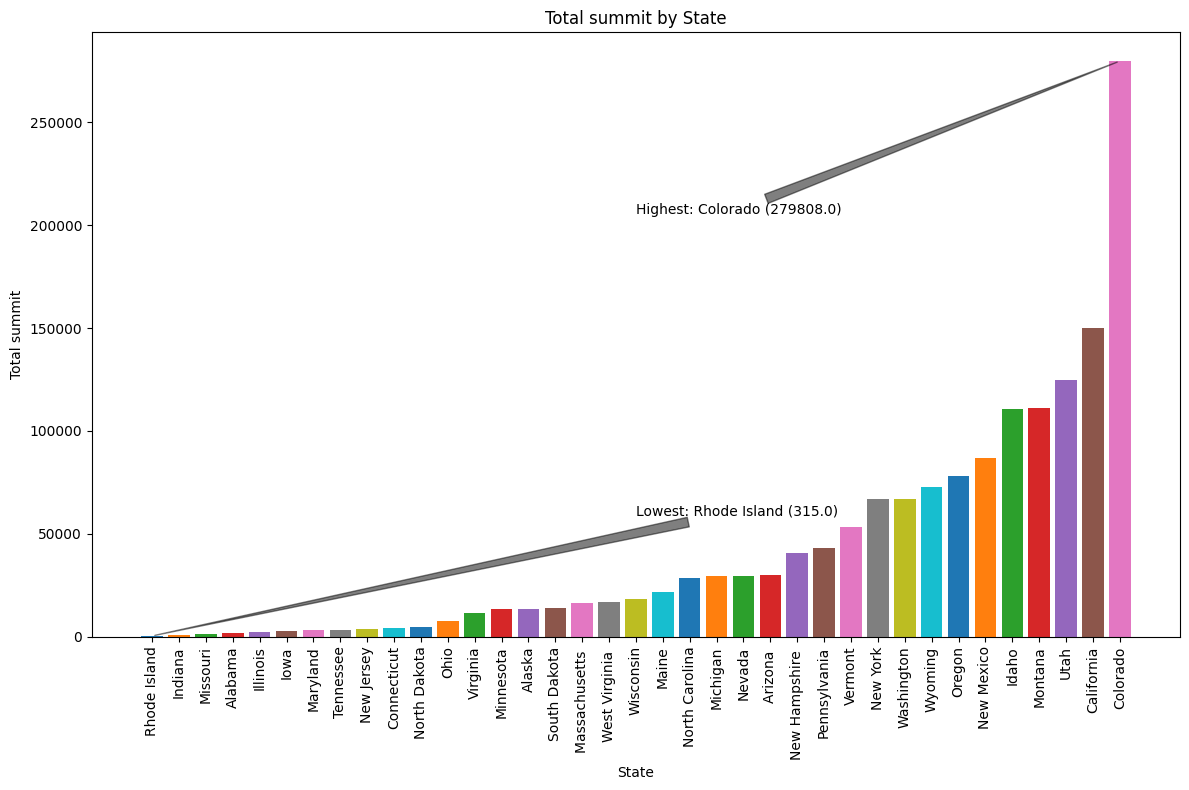

In [55]:
sorted_df = ski_df.sort_values(by='summit')
unique_states = sorted_df['state'].unique()
fig, ax = plt.subplots(figsize=(12, 8))

state_totals = []
for state in unique_states:
    state_data = sorted_df[sorted_df['state'] == state]
    total_summit = state_data['summit'].sum()
    state_totals.append((state, total_summit))

state_totals.sort(key=lambda x: x[1])

for i, (state, total_summit) in enumerate(state_totals):
    x = i
    ax.bar(x, total_summit, label=state, align='center')

ax.set_xticks(range(len(unique_states)))
ax.set_xticklabels([state for state, _ in state_totals], rotation='vertical')

ax.set_xlabel('State')
ax.set_ylabel('Total summit')

ax.set_title('Total summit by State')

lowest_state = state_totals[0][0]
lowest_value = state_totals[0][1]
highest_state = state_totals[-1][0]
highest_value = state_totals[-1][1]

ax.annotate(f'Lowest: {lowest_state} ({lowest_value})', xy=(0, lowest_value), xytext=(0.5, 0.2),
            textcoords='axes fraction', fontsize=10,
            arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5))

ax.annotate(f'Highest: {highest_state} ({highest_value})', xy=(len(unique_states) - 1, state_totals[-1][1]),
            xytext=(0.5, 0.7), textcoords='axes fraction', fontsize=10,
            arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5))

plt.tight_layout()

plt.show()


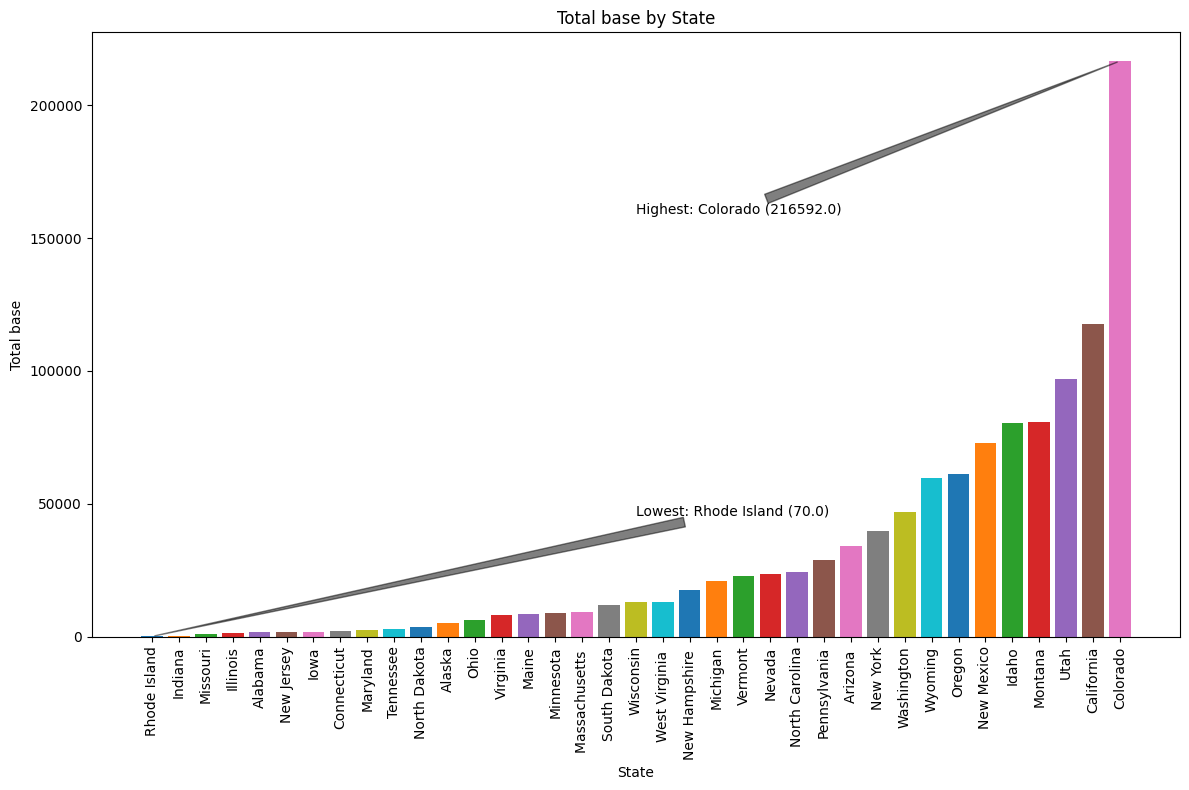

In [56]:
sorted_df = ski_df.sort_values(by='base')
unique_states = sorted_df['state'].unique()
fig, ax = plt.subplots(figsize=(12, 8))

state_totals = []
for state in unique_states:
    state_data = sorted_df[sorted_df['state'] == state]
    total_base = state_data['base'].sum()
    state_totals.append((state, total_base))

state_totals.sort(key=lambda x: x[1])

for i, (state, total_base) in enumerate(state_totals):
    x = i
    ax.bar(x, total_base, label=state, align='center')

ax.set_xticks(range(len(unique_states)))
ax.set_xticklabels([state for state, _ in state_totals], rotation='vertical')

ax.set_xlabel('State')
ax.set_ylabel('Total base')

ax.set_title('Total base by State')

lowest_state = state_totals[0][0]
lowest_value = state_totals[0][1]
highest_state = state_totals[-1][0]
highest_value = state_totals[-1][1]

ax.annotate(f'Lowest: {lowest_state} ({lowest_value})', xy=(0, lowest_value), xytext=(0.5, 0.2),
            textcoords='axes fraction', fontsize=10,
            arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5))

ax.annotate(f'Highest: {highest_state} ({highest_value})', xy=(len(unique_states) - 1, highest_value),
            xytext=(0.5, 0.7), textcoords='axes fraction', fontsize=10,
            arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5))

plt.tight_layout()

plt.show()


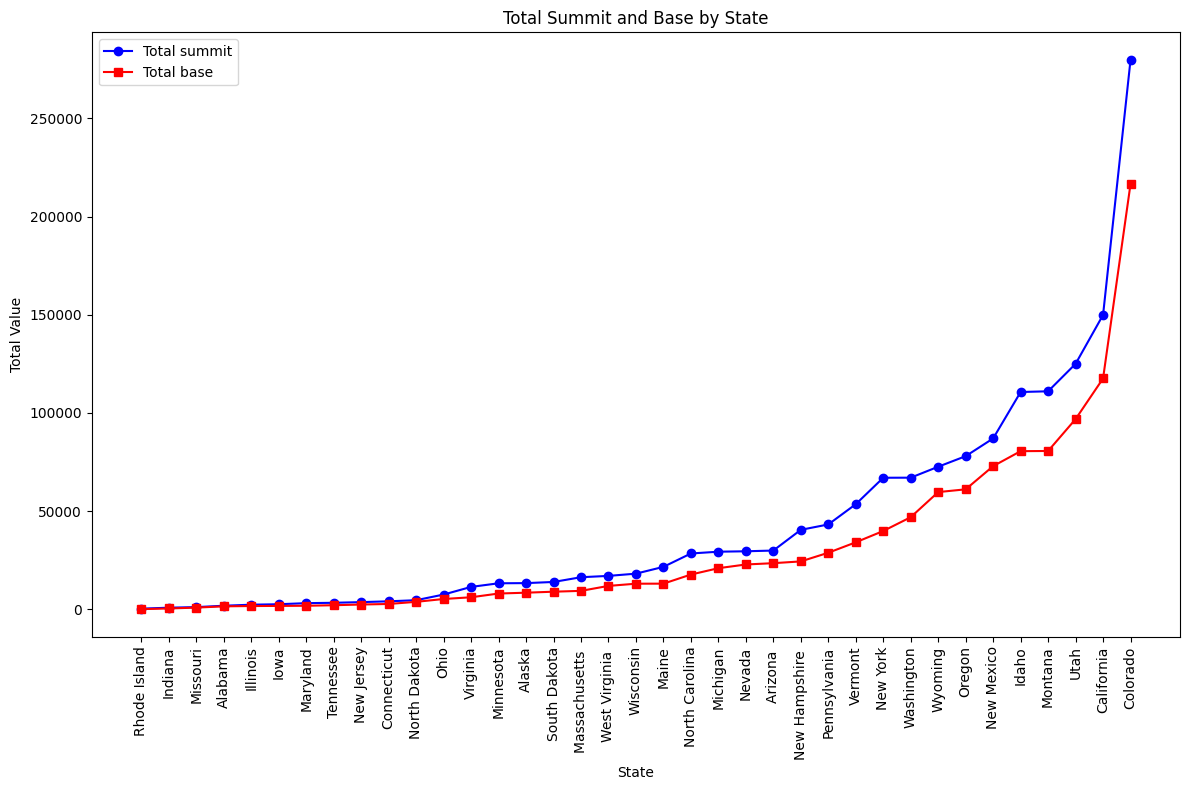

In [58]:
import matplotlib.pyplot as plt

sorted_df_summit = ski_df.sort_values(by='summit')
unique_states_summit = sorted_df_summit['state'].unique()
fig, ax = plt.subplots(figsize=(12, 8))

state_totals_summit = []
for state in unique_states_summit:
    state_data = sorted_df_summit[sorted_df_summit['state'] == state]
    total_summit = state_data['summit'].sum()
    state_totals_summit.append((state, total_summit))

state_totals_summit.sort(key=lambda x: x[1])

x_values_summit = [i for i, (_, total_summit) in enumerate(state_totals_summit)]
y_values_summit = [total_summit for (_, total_summit) in state_totals_summit]

ax.plot(x_values_summit, y_values_summit, marker='o', linestyle='-', color='b', label='Total summit')

sorted_df_base = ski_df.sort_values(by='base')
unique_states_base = sorted_df_base['state'].unique()

state_totals_base = []
for state in unique_states_base:
    state_data = sorted_df_base[sorted_df_base['state'] == state]
    total_base = state_data['base'].sum()
    state_totals_base.append((state, total_base))

state_totals_base.sort(key=lambda x: x[1])

x_values_base = [i for i, (_, total_base) in enumerate(state_totals_base)]
y_values_base = [total_base for (_, total_base) in state_totals_base]

ax.plot(x_values_base, y_values_base, marker='s', linestyle='-', color='r', label='Total base')

# Customize plot appearance
ax.set_xticks(x_values_summit)
ax.set_xticklabels([state for state, _ in state_totals_summit], rotation='vertical')

ax.set_xlabel('State')
ax.set_ylabel('Total Value')
ax.set_title('Total Summit and Base by State')
ax.legend()

plt.tight_layout()

plt.show()



The Vertical

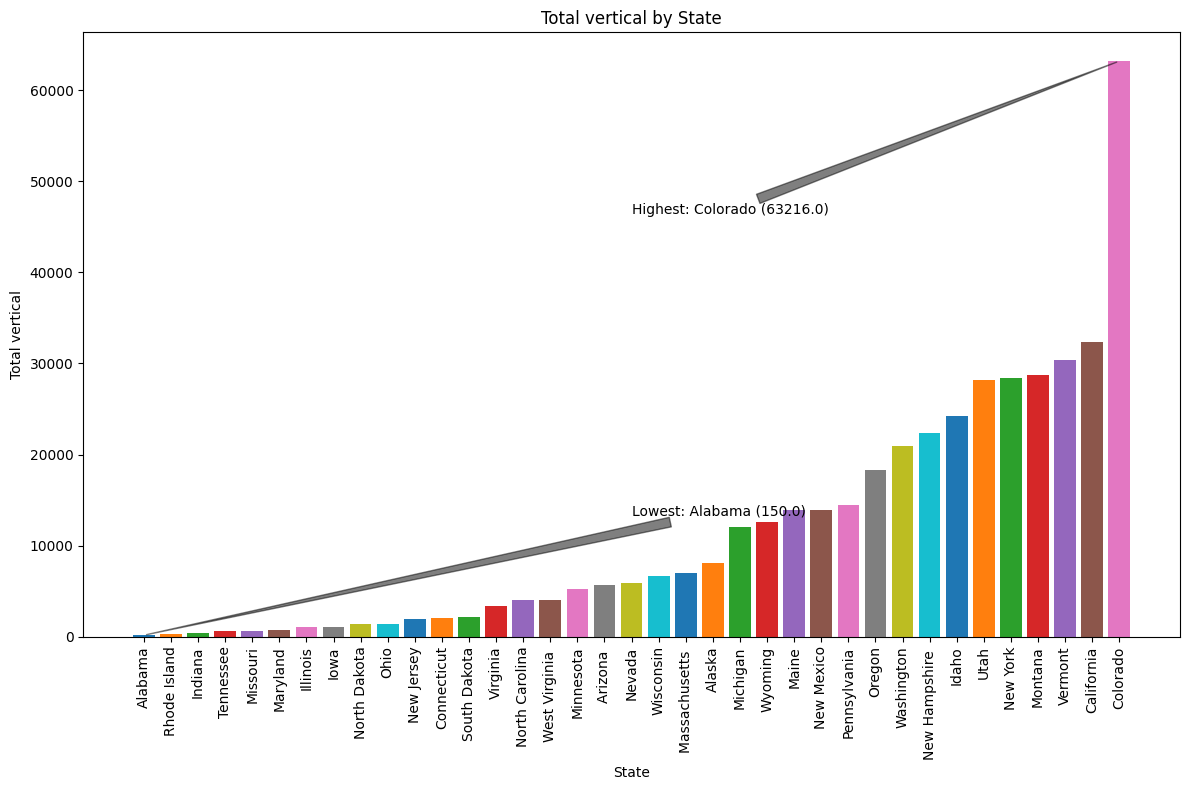

In [59]:
sorted_df = ski_df.sort_values(by='vertical')
unique_states = sorted_df['state'].unique()
fig, ax = plt.subplots(figsize=(12, 8))

state_totals = []
for state in unique_states:
    state_data = sorted_df[sorted_df['state'] == state]
    total_vertical = state_data['vertical'].sum()
    state_totals.append((state, total_vertical))

state_totals.sort(key=lambda x: x[1])

for i, (state, total_vertical) in enumerate(state_totals):
    x = i
    ax.bar(x, total_vertical, label=state, align='center')

ax.set_xticks(range(len(unique_states)))
ax.set_xticklabels([state for state, _ in state_totals], rotation='vertical')

ax.set_xlabel('State')
ax.set_ylabel('Total vertical')

ax.set_title('Total vertical by State')

lowest_state = state_totals[0][0]
lowest_value = state_totals[0][1]
highest_state = state_totals[-1][0]
highest_value = state_totals[-1][1]

ax.annotate(f'Lowest: {lowest_state} ({lowest_value})', xy=(0, lowest_value), xytext=(0.5, 0.2),
            textcoords='axes fraction', fontsize=10,
            arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5))

ax.annotate(f'Highest: {highest_state} ({highest_value})', xy=(len(unique_states) - 1, highest_value),
            xytext=(0.5, 0.7), textcoords='axes fraction', fontsize=10,
            arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5))

plt.tight_layout()

plt.show()


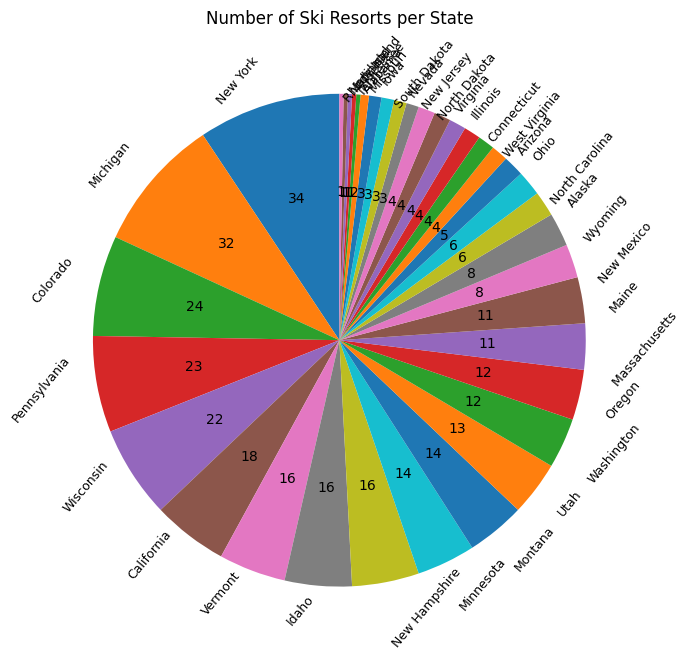

In [44]:
resorts_per_state = ski_df['state'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
pie = ax.pie(resorts_per_state, labels=resorts_per_state.index, autopct=lambda p: '{:.0f}'.format(p * sum(resorts_per_state) / 100),
              startangle=90)
for label in pie[1]:
    label.set_fontsize(9)
    label.set_rotation(50) 

ax.set_title('Number of Ski Resorts per State')

plt.show()


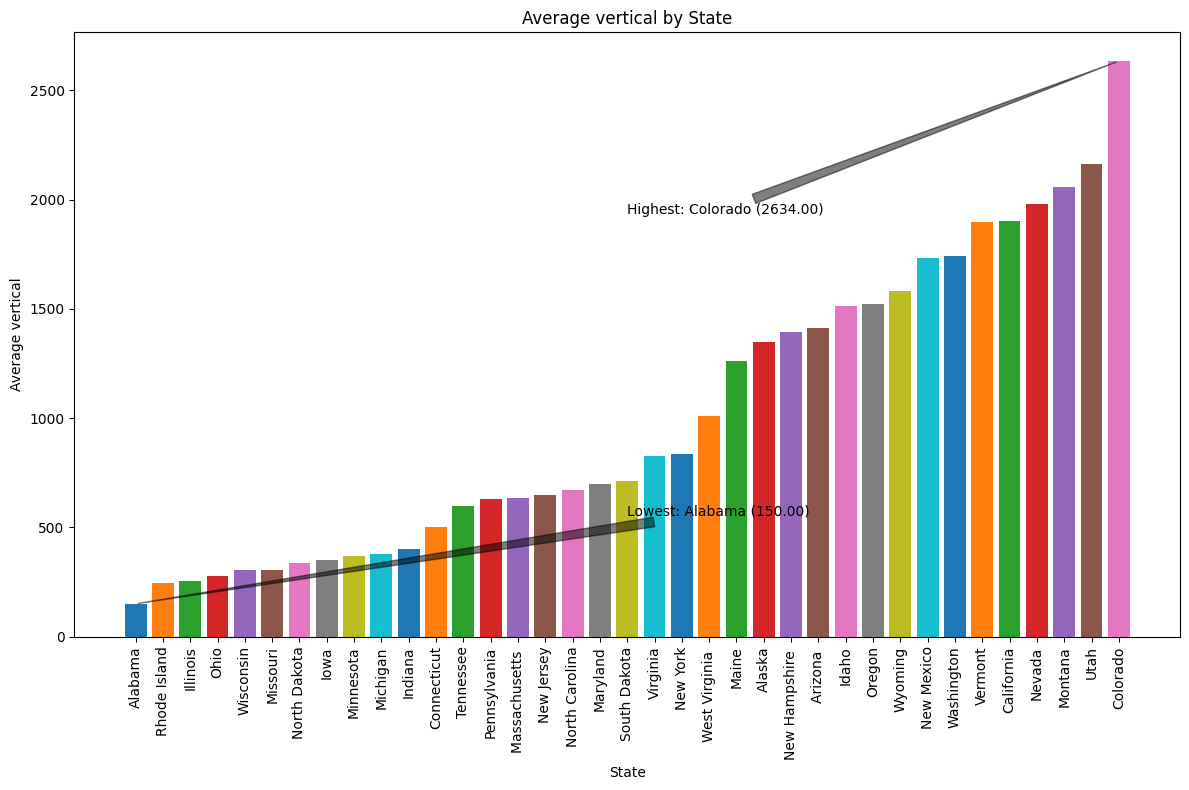

In [75]:
sorted_df = ski_df.sort_values(by='vertical')
unique_states = sorted_df['state'].unique()
fig, ax = plt.subplots(figsize=(12, 8))

state_avg_verticals = []
for state in unique_states:
    state_data = sorted_df[sorted_df['state'] == state]
    avg_vertical = state_data['vertical'].mean() 
    state_avg_verticals.append((state, avg_vertical))

state_avg_verticals.sort(key=lambda x: x[1])

for i, (state, avg_vertical) in enumerate(state_avg_verticals):
    x = i
    ax.bar(x, avg_vertical, label=state, align='center')

ax.set_xticks(range(len(unique_states)))
ax.set_xticklabels([state for state, _ in state_avg_verticals], rotation='vertical')

ax.set_xlabel('State')
ax.set_ylabel('Average vertical')

ax.set_title('Average vertical by State')

lowest_state = state_avg_verticals[0][0]
lowest_value = state_avg_verticals[0][1]
highest_state = state_avg_verticals[-1][0]
highest_value = state_avg_verticals[-1][1]

ax.annotate(f'Lowest: {lowest_state} ({lowest_value:.2f})', xy=(0, lowest_value), xytext=(0.5, 0.2),
            textcoords='axes fraction', fontsize=10,
            arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5))

ax.annotate(f'Highest: {highest_state} ({highest_value:.2f})', xy=(len(unique_states) - 1, highest_value),
            xytext=(0.5, 0.7), textcoords='axes fraction', fontsize=10,
            arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5))

plt.tight_layout()

plt.show()


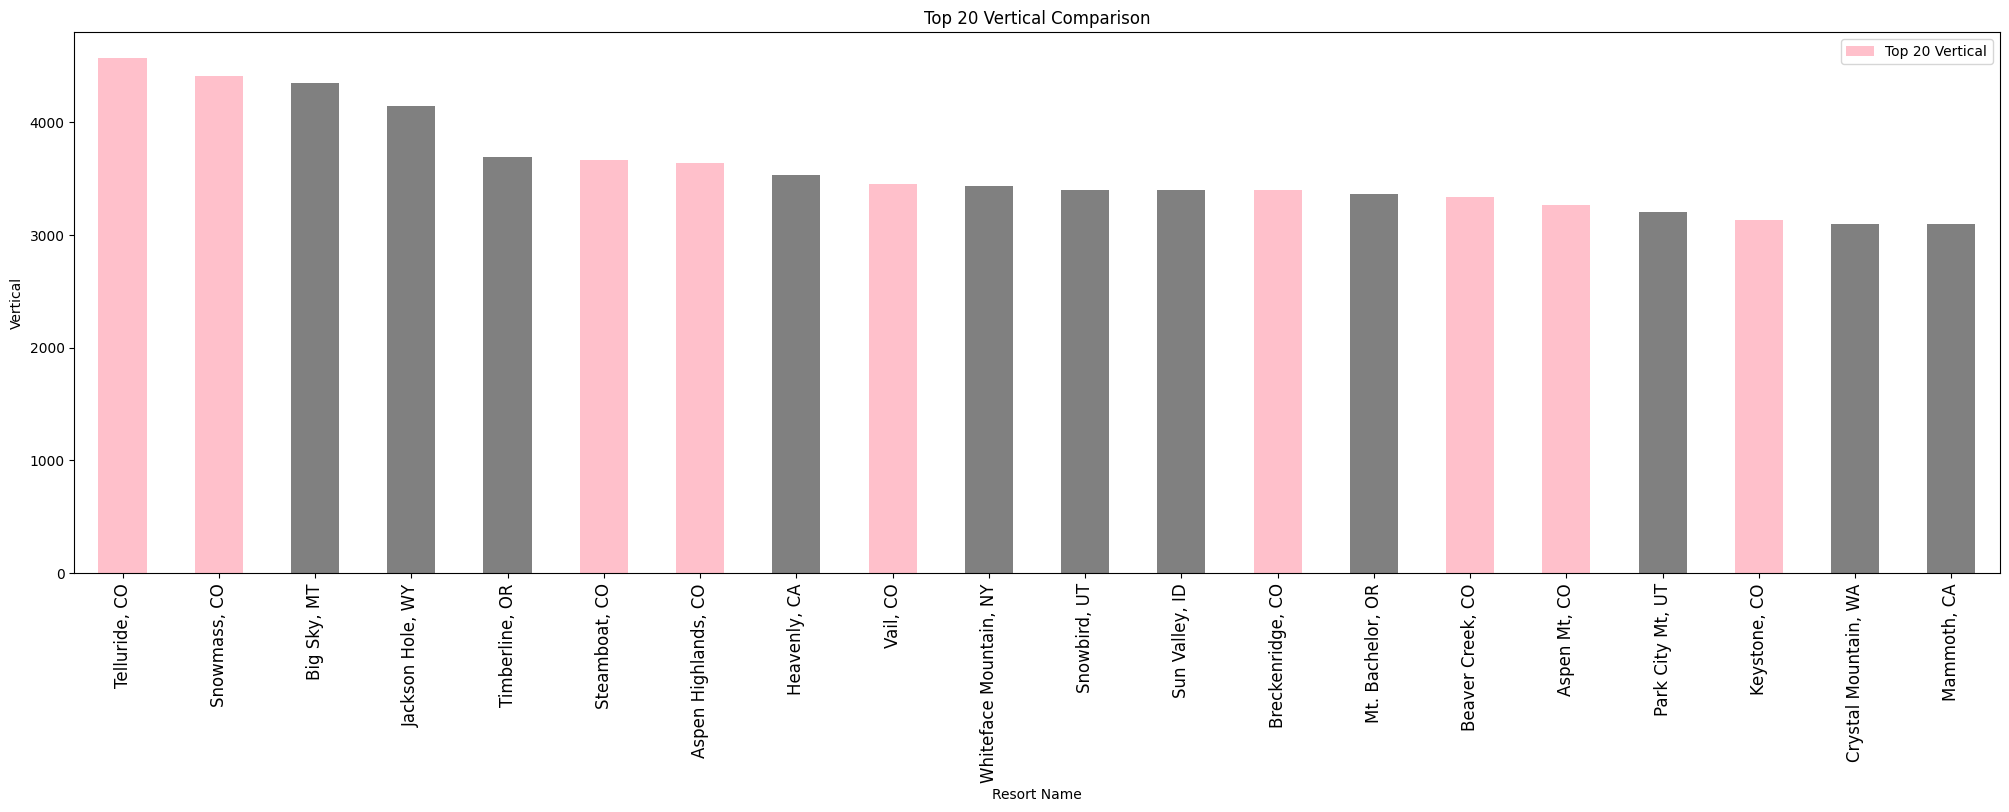

In [60]:
sorted_df = ski_df.sort_values(by='vertical')

top_20_resorts = sorted_df.nlargest(20, 'vertical')

fig, ax = plt.subplots(figsize=(20, 8))

state_palette = {
    'Colorado': 'pink',
}

colors = [state_palette.get(state, 'gray') for state in top_20_resorts['state']]

top_20_resorts.plot(x='resort_name', y='vertical', kind='bar', ax=ax, label='Top 20 Vertical', color=colors)

ax.set_xticks(range(len(top_20_resorts)))
ax.set_xticklabels(top_20_resorts['resort_name'], rotation='vertical', fontsize=12)

plt.tight_layout()

ax.set_title('Top 20 Vertical Comparison')
ax.set_xlabel('Resort Name')
ax.set_ylabel('Vertical')

plt.show()



Maps Showing vertical

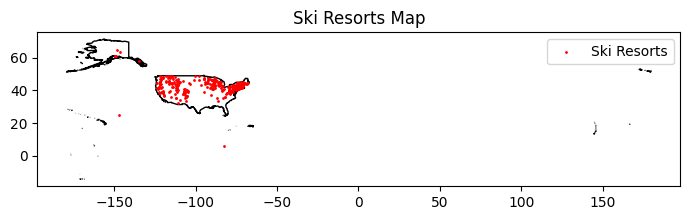

In [71]:
import geopandas as gpd
import matplotlib.pyplot as plt
geometry = gpd.points_from_xy(ski_df.lon, ski_df.lat)
gdf = gpd.GeoDataFrame(ski_df, geometry=geometry)

us_boundaries = gpd.read_file('usa.json')

fig, ax = plt.subplots(figsize=(20, 2)) 

us_boundaries.plot(ax=ax, color='white', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='red', markersize=1, label='Ski Resorts')

ax.set_title('Ski Resorts Map')
ax.legend()

plt.show()

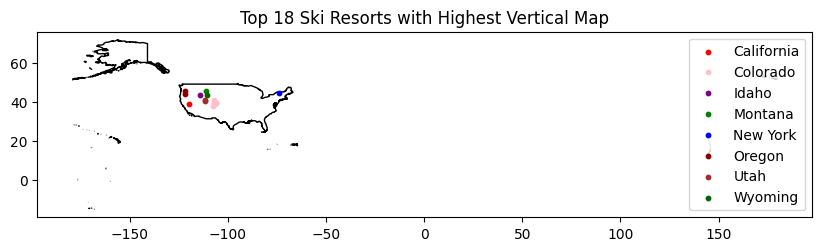

In [53]:
top_resorts = ski_df.sort_values(by='vertical', ascending=False).head(18)

state_colors = {
    'Colorado': 'pink',
    'California': 'red',
    'Utah': 'brown',
    'Idaho':'purple',
    'Montana':'green',
    'New York':'blue',
    'Oregon':'darkred',
    'Wyoming':'darkgreen',
}

geometry = gpd.points_from_xy(top_resorts.lon, top_resorts.lat)
gdf = gpd.GeoDataFrame(top_resorts, geometry=geometry)

us_boundaries = gpd.read_file('usa.json')

fig, ax = plt.subplots(figsize=(10, 10)) 

us_boundaries.plot(ax=ax, color='white', edgecolor='black')

for state, resorts in gdf.groupby('state'):
    color = state_colors.get(state, 'gray') 
    resorts.plot(ax=ax, marker='o', color=color, markersize=10, label=state)

ax.set_title('Top 18 Ski Resorts with Highest Vertical Map')
ax.legend()

plt.show()

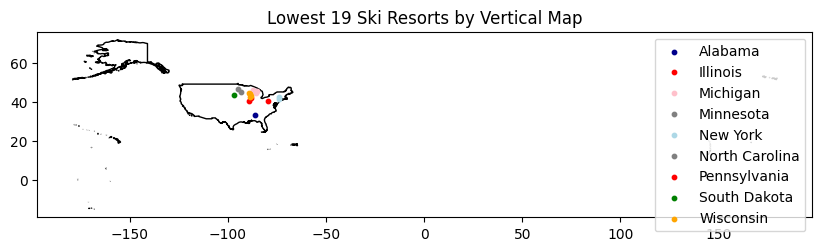

In [54]:
lowest_resorts = ski_df.sort_values(by='vertical', ascending=True).head(19)

state_colors = {
    'Alabama': 'darkblue',
    'Illinois': 'red',
    'Michigan': 'pink',
    'Minnesota': 'grey',
    'New York': 'lightblue',
    'North Carolina':'grey',
    'Pennsylvania': 'red',
    'South Dakota': 'green',
    'Wisconsin': 'orange',
}

geometry = gpd.points_from_xy(lowest_resorts.lon, lowest_resorts.lat)
gdf = gpd.GeoDataFrame(lowest_resorts, geometry=geometry)

us_boundaries = gpd.read_file('usa.json')

fig, ax = plt.subplots(figsize=(10, 10)) 

us_boundaries.plot(ax=ax, color='white', edgecolor='black')

for state, resorts in gdf.groupby('state'):
    color = state_colors.get(state, 'gray') 
    resorts.plot(ax=ax, marker='o', color=color, markersize=10, label=state)

ax.set_title('Lowest 19 Ski Resorts by Vertical Map')
ax.legend()

plt.show()

Lifts VS Runs

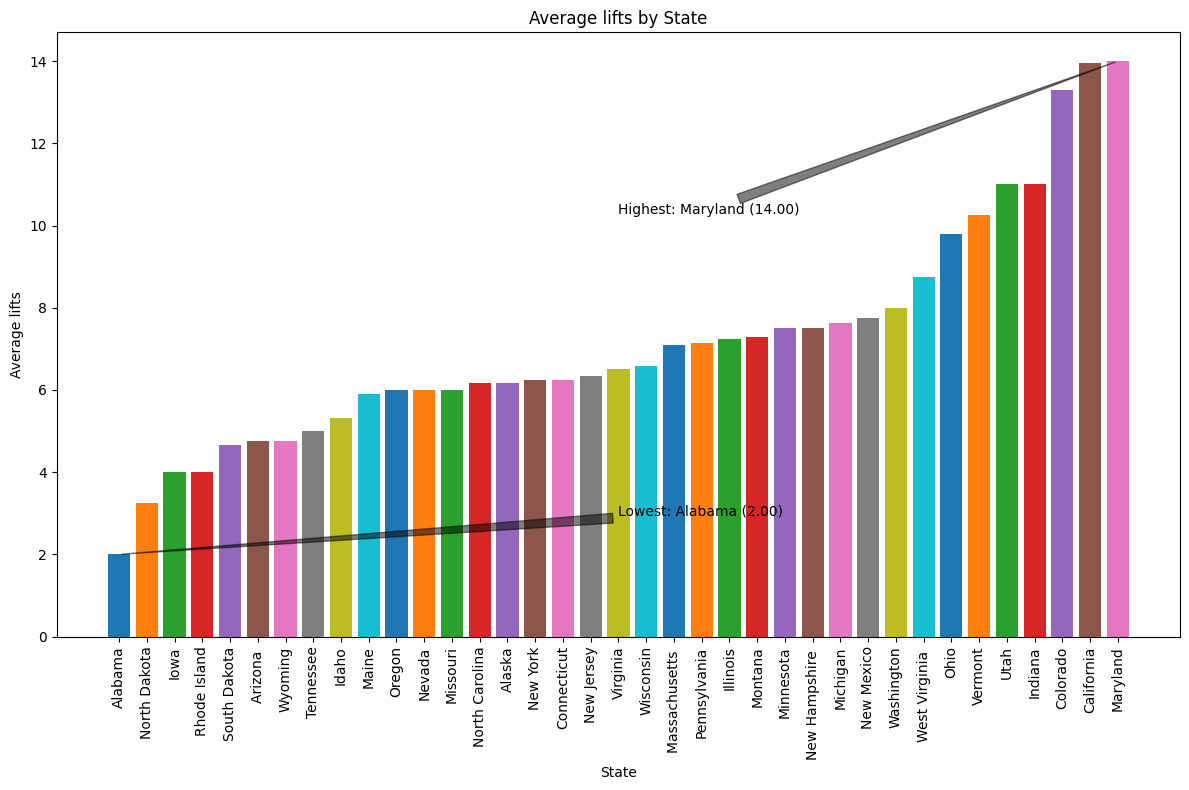

In [76]:
sorted_df = ski_df.sort_values(by='lifts')
unique_states = sorted_df['state'].unique()
fig, ax = plt.subplots(figsize=(12, 8))

state_avg_lifts = []
for state in unique_states:
    state_data = sorted_df[sorted_df['state'] == state]
    avg_lifts = state_data['lifts'].mean() 
    state_avg_lifts.append((state, avg_lifts))

state_avg_lifts.sort(key=lambda x: x[1])

for i, (state, avg_lifts) in enumerate(state_avg_lifts):
    x = i
    ax.bar(x, avg_lifts, label=state, align='center')

ax.set_xticks(range(len(unique_states)))
ax.set_xticklabels([state for state, _ in state_avg_lifts], rotation='vertical')

ax.set_xlabel('State')
ax.set_ylabel('Average lifts')

ax.set_title('Average lifts by State')

lowest_state = state_avg_lifts[0][0]
lowest_value = state_avg_lifts[0][1]
highest_state = state_avg_lifts[-1][0]
highest_value = state_avg_lifts[-1][1]

ax.annotate(f'Lowest: {lowest_state} ({lowest_value:.2f})', xy=(0, lowest_value), xytext=(0.5, 0.2),
            textcoords='axes fraction', fontsize=10,
            arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5))

ax.annotate(f'Highest: {highest_state} ({highest_value:.2f})', xy=(len(unique_states) - 1, highest_value),
            xytext=(0.5, 0.7), textcoords='axes fraction', fontsize=10,
            arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5))

plt.tight_layout()

plt.show()




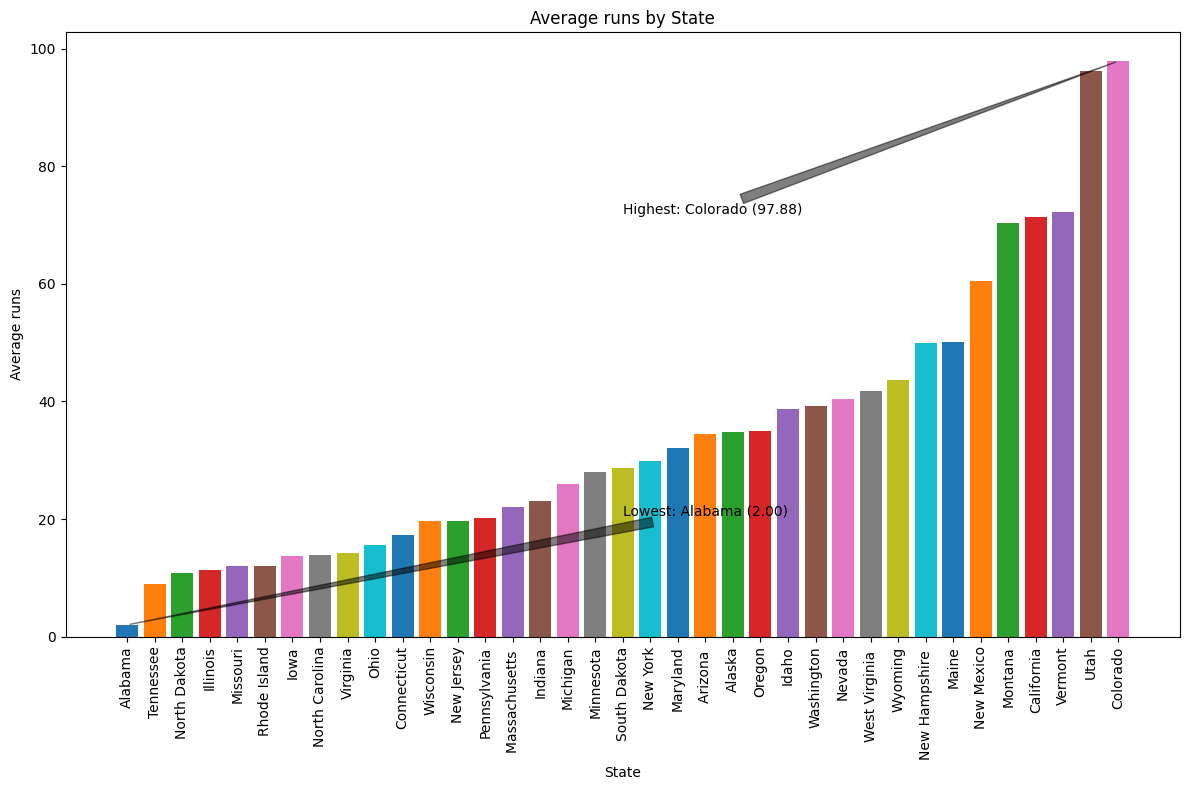

In [77]:
sorted_df = ski_df.sort_values(by='runs')
unique_states = sorted_df['state'].unique()
fig, ax = plt.subplots(figsize=(12, 8))

state_avg_runs = []
for state in unique_states:
    state_data = sorted_df[sorted_df['state'] == state]
    avg_runs = state_data['runs'].mean() 
    state_avg_runs.append((state, avg_runs))

state_avg_runs.sort(key=lambda x: x[1])

for i, (state, avg_runs) in enumerate(state_avg_runs):
    x = i
    ax.bar(x, avg_runs, label=state, align='center')

ax.set_xticks(range(len(unique_states)))
ax.set_xticklabels([state for state, _ in state_avg_runs], rotation='vertical')

ax.set_xlabel('State')
ax.set_ylabel('Average runs')

ax.set_title('Average runs by State')

lowest_state = state_avg_runs[0][0]
lowest_value = state_avg_runs[0][1]
highest_state = state_avg_runs[-1][0]
highest_value = state_avg_runs[-1][1]

ax.annotate(f'Lowest: {lowest_state} ({lowest_value:.2f})', xy=(0, lowest_value), xytext=(0.5, 0.2),
            textcoords='axes fraction', fontsize=10,
            arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5))

ax.annotate(f'Highest: {highest_state} ({highest_value:.2f})', xy=(len(unique_states) - 1, highest_value),
            xytext=(0.5, 0.7), textcoords='axes fraction', fontsize=10,
            arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5))

plt.tight_layout()

plt.show()


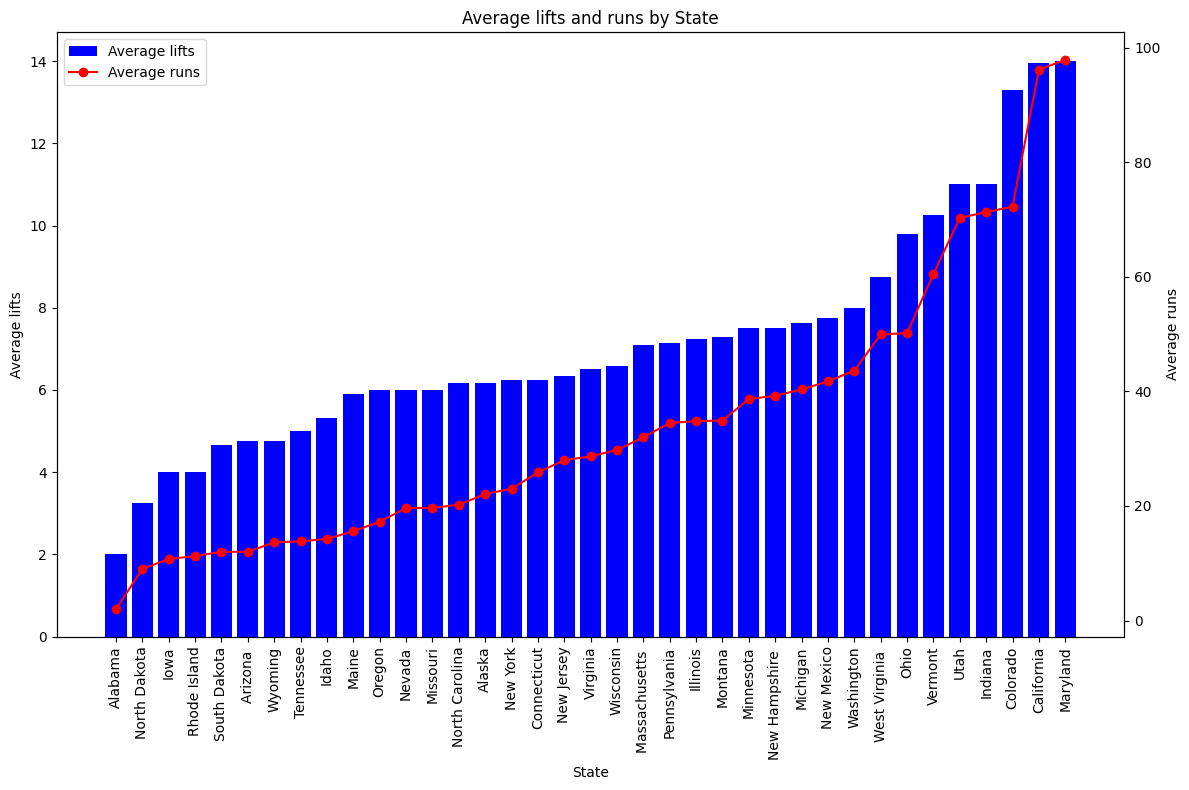

In [78]:
import matplotlib.pyplot as plt

# Average lifts plot
sorted_df_lifts = ski_df.sort_values(by='lifts')
unique_states_lifts = sorted_df_lifts['state'].unique()
fig, ax1 = plt.subplots(figsize=(12, 8))

state_avg_lifts = []
for state in unique_states_lifts:
    state_data = sorted_df_lifts[sorted_df_lifts['state'] == state]
    avg_lifts = state_data['lifts'].mean()
    state_avg_lifts.append((state, avg_lifts))

state_avg_lifts.sort(key=lambda x: x[1])

x_values_lifts = [i for i, (_, avg_lifts) in enumerate(state_avg_lifts)]
y_values_lifts = [avg_lifts for (_, avg_lifts) in state_avg_lifts]

ax1.bar(x_values_lifts, y_values_lifts, color='b', label='Average lifts')
ax1.set_xticks(x_values_lifts)
ax1.set_xticklabels([state for state, _ in state_avg_lifts], rotation='vertical')

ax1.set_xlabel('State')
ax1.set_ylabel('Average lifts')
ax1.set_title('Average lifts and runs by State')

# Create a twin Axes for average runs
ax2 = ax1.twinx()

# Average runs plot
sorted_df_runs = ski_df.sort_values(by='runs')
unique_states_runs = sorted_df_runs['state'].unique()

state_avg_runs = []
for state in unique_states_runs:
    state_data = sorted_df_runs[sorted_df_runs['state'] == state]
    avg_runs = state_data['runs'].mean()
    state_avg_runs.append((state, avg_runs))

state_avg_runs.sort(key=lambda x: x[1])

x_values_runs = [i for i, (_, avg_runs) in enumerate(state_avg_runs)]
y_values_runs = [avg_runs for (_, avg_runs) in state_avg_runs]

ax2.plot(x_values_runs, y_values_runs, marker='o', linestyle='-', color='r', label='Average runs')
ax2.set_ylabel('Average runs')

# Legend for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()

plt.show()


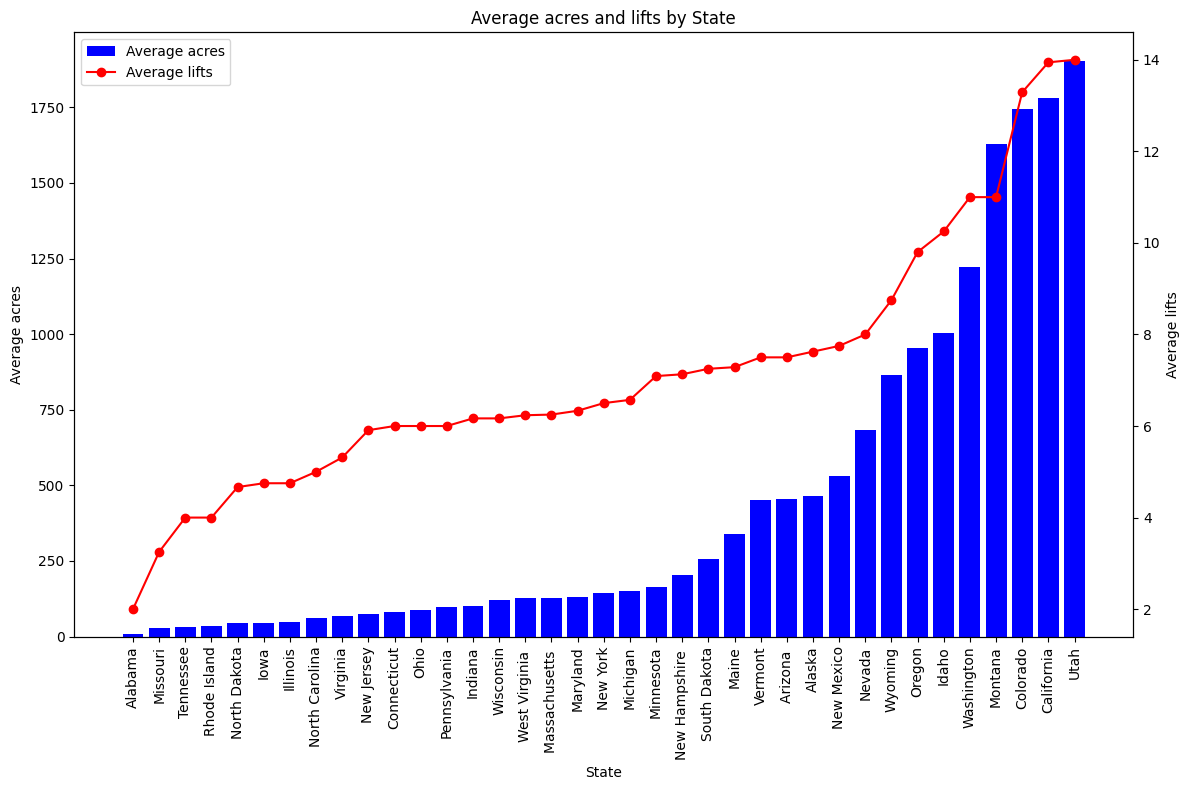

In [74]:
import matplotlib.pyplot as plt

# Average acres plot
sorted_df_acres = ski_df.sort_values(by='acres')
unique_states_acres = sorted_df_acres['state'].unique()
fig, ax1 = plt.subplots(figsize=(12, 8))

state_avg_acres = []
for state in unique_states_acres:
    state_data = sorted_df_acres[sorted_df_acres['state'] == state]
    avg_acres = state_data['acres'].mean()
    state_avg_acres.append((state, avg_acres))

state_avg_acres.sort(key=lambda x: x[1])

x_values_acres = [i for i, (_, avg_acres) in enumerate(state_avg_acres)]
y_values_acres = [avg_acres for (_, avg_acres) in state_avg_acres]

ax1.bar(x_values_acres, y_values_acres, color='b', label='Average acres')
ax1.set_xticks(x_values_acres)
ax1.set_xticklabels([state for state, _ in state_avg_acres], rotation='vertical')

ax1.set_xlabel('State')
ax1.set_ylabel('Average acres')
ax1.set_title('Average acres and lifts by State')

# Create a twin Axes for average lifts
ax2 = ax1.twinx()

# Average lifts plot
sorted_df_lifts = ski_df.sort_values(by='lifts')
unique_states_lifts = sorted_df_lifts['state'].unique()

state_avg_lifts = []
for state in unique_states_lifts:
    state_data = sorted_df_lifts[sorted_df_lifts['state'] == state]
    avg_lifts = state_data['lifts'].mean()
    state_avg_lifts.append((state, avg_lifts))

state_avg_lifts.sort(key=lambda x: x[1])

x_values_lifts = [i for i, (_, avg_lifts) in enumerate(state_avg_lifts)]
y_values_lifts = [avg_lifts for (_, avg_lifts) in state_avg_lifts]

ax2.plot(x_values_lifts, y_values_lifts, marker='o', linestyle='-', color='r', label='Average lifts')
ax2.set_ylabel('Average lifts')

# Legend for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()

plt.show()


Green, Blue and Black run Comparison

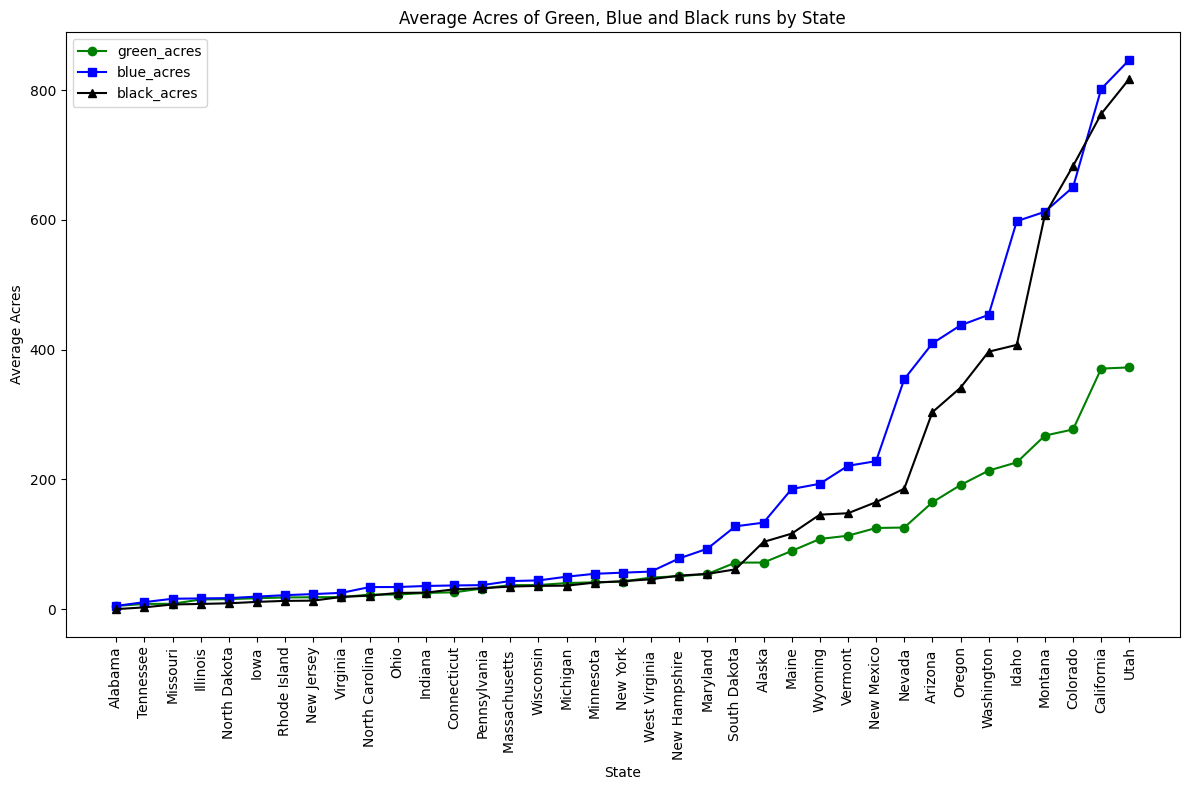

In [80]:
import matplotlib.pyplot as plt

# Average green_acres plot
sorted_df_green = ski_df.sort_values(by='green_acres')
unique_states_green = sorted_df_green['state'].unique()
fig, ax = plt.subplots(figsize=(12, 8))

state_avg_green_acres = []
for state in unique_states_green:
    state_data = sorted_df_green[sorted_df_green['state'] == state]
    avg_green_acres = state_data['green_acres'].mean()
    state_avg_green_acres.append((state, avg_green_acres))

state_avg_green_acres.sort(key=lambda x: x[1])

x_values_green = [i for i, (_, avg_green_acres) in enumerate(state_avg_green_acres)]
y_values_green = [avg_green_acres for (_, avg_green_acres) in state_avg_green_acres]

ax.plot(x_values_green, y_values_green, marker='o', linestyle='-', color='green', label='green_acres')

# Average blue_acres plot
sorted_df_blue = ski_df.sort_values(by='blue_acres')
unique_states_blue = sorted_df_blue['state'].unique()

state_avg_blue_acres = []
for state in unique_states_blue:
    state_data = sorted_df_blue[sorted_df_blue['state'] == state]
    avg_blue_acres = state_data['blue_acres'].mean()
    state_avg_blue_acres.append((state, avg_blue_acres))

state_avg_blue_acres.sort(key=lambda x: x[1])

x_values_blue = [i for i, (_, avg_blue_acres) in enumerate(state_avg_blue_acres)]
y_values_blue = [avg_blue_acres for (_, avg_blue_acres) in state_avg_blue_acres]

ax.plot(x_values_blue, y_values_blue, marker='s', linestyle='-', color='blue', label='blue_acres')

# Average black_acres plot
sorted_df_black = ski_df.sort_values(by='black_acres')
unique_states_black = sorted_df_black['state'].unique()

state_avg_black_acres = []
for state in unique_states_black:
    state_data = sorted_df_black[sorted_df_black['state'] == state]
    avg_black_acres = state_data['black_acres'].mean()
    state_avg_black_acres.append((state, avg_black_acres))

state_avg_black_acres.sort(key=lambda x: x[1])

x_values_black = [i for i, (_, avg_black_acres) in enumerate(state_avg_black_acres)]
y_values_black = [avg_black_acres for (_, avg_black_acres) in state_avg_black_acres]

ax.plot(x_values_black, y_values_black, marker='^', linestyle='-', color='black', label='black_acres')

# Customize plot appearance
ax.set_xticks(x_values_green)
ax.set_xticklabels([state for state, _ in state_avg_green_acres], rotation='vertical')

ax.set_xlabel('State')
ax.set_ylabel('Average Acres')
ax.set_title('Average Acres of Green, Blue and Black runs by State')
ax.legend()

plt.tight_layout()

plt.show()



